In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob 
import numpy as np
import seaborn as sb

/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# lista de todos os arquivos
caged_files = sorted(glob('teste/CAGEDMOV*.txt'))
# concatena os arquivos
pandemia_df = pd.concat((pd.read_csv(file, sep=';') for file in caged_files), ignore_index=True)

In [3]:
pandemia_df.columns

Index(['competência', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'fonte'],
      dtype='object')

In [4]:
caged_files

['teste/CAGEDMOV202101.txt',
 'teste/CAGEDMOV202102.txt',
 'teste/CAGEDMOV202103.txt']

In [5]:
questao01c_df = pandemia_df[['competência', 'saldomovimentação', 'idade']]
# questao01c_df[questao01c_df['idade'].isnull()]

In [6]:
# questao01c_df.head()

In [7]:
saldomovimentacao = {
    1: 'admissao',
    -1: 'demissao'
}

questao01c_df['saldomovimentação'] = questao01c_df['saldomovimentação'].apply(lambda x: saldomovimentacao[x])

/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 1 – Qual foi o índice de pessoas empregadas e desempregadas em certo período, categorizadas por:


In [8]:
# cria coluna 'Faixa Etária' com base em faixas de 10 anos, até os 74aa
passos = int((questao01c_df['idade'].max() - questao01c_df['idade'].min()) / 10)

idade = questao01c_df['idade'].min()
for i in range(passos-2):
    idade_2 = idade + 10
    questao01c_df.loc[(questao01c_df['idade']>=idade) & (questao01c_df['idade']<idade_2), 'Faixa Etária'] = str(int(idade)) + '-' + str(int(idade+9))
    idade = idade_2

questao01c_df.loc[(questao01c_df['idade']>=idade), 'Faixa Etária'] = str(int(idade)) + '+'
questao01c_df.loc[(questao01c_df['idade'].isnull()), 'Faixa Etária'] = 'Não informado'


/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A val

In [9]:
# questao01c_df['Faixa Etária'].value_counts().sort_index().tail(50)

In [10]:
admissoes = questao01c_df['saldomovimentação'] == "admissao"
demissoes = questao01c_df['saldomovimentação'] == "demissao"

In [11]:
admissoes_df = questao01c_df[admissoes]
# admissoes_df.head()

In [12]:
demissoes_df = questao01c_df[demissoes]
# demissoes_df.head()

In [13]:
# admissoes_df['idade_faixa'] = 
# admissoes_df[['competência','Faixa Etária']].value_counts().sort_index().sum()
# admissoes_df[admissoes_df['idade'].isnull()][['competência','idade']]
# admissoes_df.head()


## - Faixa Etária

### Admissões

In [14]:
#cria pivot table para ter 'competencia' como index, e contar valores em 'idade'
admissoes_pivot = pd.pivot_table(admissoes_df, 
                       columns=['Faixa Etária'], 
                       index=['competência'],
                       values=['idade'],
                       aggfunc='count'
                      )
# admissoes_pivot

In [15]:
# converte indice para string para pontuar no eixo y
admissoes_pivot.index = admissoes_pivot.index.map(str)

In [18]:
# cria DF a partir da pivot table
admissoes_pivot_df = pd.DataFrame(admissoes_pivot.to_records(), 
                  index=admissoes_pivot.index
)
# limpa nome das colunas
admissoes_pivot_df.columns = [hdr.replace("('idade', '", "").replace("')", "") \
                     for hdr in admissoes_pivot_df.columns]
# elimina coluna adicional que foi utilizada como índice
admissoes_pivot_df.drop(['competência'], axis=1, inplace=True)
# admissoes_pivot_df

In [19]:
# cria coluna Total para receber o total por competencia
admissoes_pivot_df["Total"] = 0
for index in admissoes_pivot_df.index:
    admissoes_pivot_df["Total"][str(index)] = admissoes_pivot_df.sum(axis=1)[str(index)]
    

In [20]:
# admissoes_pivot_df.columns

In [21]:
for column in admissoes_pivot_df.columns:
    if column != "Total":
        new_column = str(column + " anos")
#         df.drop([new_column], axis=1, inplace=True)
        admissoes_pivot_df[new_column] = round(admissoes_pivot_df[column] /  admissoes_pivot_df["Total"] * 100,2)

In [22]:
colunas_grafico = [column for column in admissoes_pivot_df.columns if ' anos' in column] 
admissoes_pivot_df[colunas_grafico]

,14-23 anos,24-33 anos,34-43 anos,44-53 anos,54-63 anos,64-73 anos,74+ anos
competência,,,,,,,
202101,24.12,35.62,24.19,11.81,3.87,0.38,0.02
202102,24.87,34.81,24.07,11.94,3.94,0.36,0.02
202103,23.92,35.12,24.71,12.00,3.87,0.36,0.02


### Visual

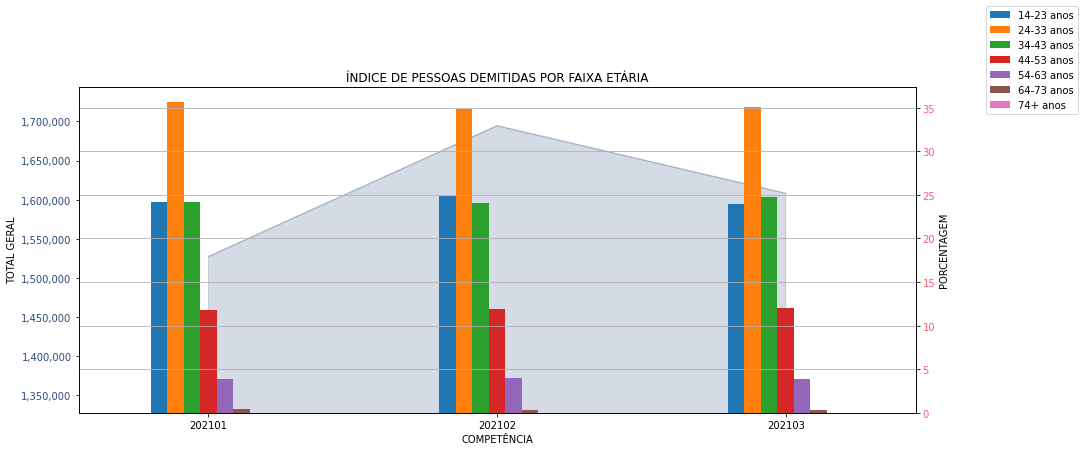

In [23]:
fig, ax1 = plt.subplots()
#ax1
ax1_color = '#2f4b7c'
ax1.set_title('ÍNDICE DE PESSOAS DEMITIDAS POR FAIXA ETÁRIA')
ax1 = admissoes_pivot_df[
    'Total'].plot(kind='area',
                  alpha=0.2,
                  color=ax1_color,
                  figsize = (15,6),
                  ylim=[admissoes_pivot_df['Total'].min()-200000, admissoes_pivot_df['Total'].max()+50000],
                  ylabel='TOTAL GERAL',
                  xlabel='COMPETÊNCIA'
                 )

ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.ticklabel_format(axis='y',style='plain', ) 
ax1.get_yaxis().set_major_formatter(
mpl.ticker.FuncFormatter(
    lambda x, p: format(int(x), ',')))

#ax2
ax2_color = '#f95d6a'
ax2 = ax1.twinx()
ax2.tick_params(axis='y', labelcolor=ax2_color)
admissoes_pivot_df[colunas_grafico].plot.bar(
         width= 0.4,
        grid = True,
#         stacked=True,
        ylabel='PORCENTAGEM',
#          ylim=[0, 70],
         ax=ax2
    ).legend(
    bbox_to_anchor=(1.2, .9), loc='lower right')


<AxesSubplot:title={'center':'ÍNDICE DE PESSOAS ADMITIDAS POR FAIXA ETÁRIA'}, ylabel='Período de Pandemia'>

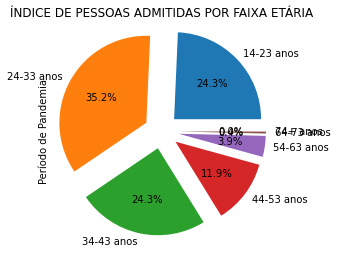

In [24]:
admissoes_pivot_df.sum()[-7:].plot.pie(
    autopct='%1.1f%%',
    explode=(0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2),
    title='ÍNDICE DE PESSOAS ADMITIDAS POR FAIXA ETÁRIA',
    ylabel= 'Período de Pandemia'
)

### Demissões

In [25]:
#cria pivot table para ter 'competencia' como index, e contar valores em 'idade'
demissoes_pivot = pd.pivot_table(demissoes_df, 
                       columns=['Faixa Etária'], 
                       index=['competência'],
                       values=['idade'],
                       aggfunc='count'
                      )
demissoes_pivot

idade                                                          
Faixa Etária   14-23   24-33   34-43   44-53  54-63  64-73   74+ Não informado
competência                                                                   
202101        257021  463582  318251  154595  61100  11128  1041             0
202102        252927  469985  329792  162638  65660  11007   947             0
202103        272743  511391  366397  184548  74543  13175  1066             0

In [26]:
# converte indice para string para pontuar no eixo y
demissoes_pivot.index = demissoes_pivot.index.map(str)

In [33]:
# cria DF a partir da pivot table
demissoes_pivot_df = pd.DataFrame(demissoes_pivot.to_records(), 
                  index=demissoes_pivot.index
)
# limpa nome das colunas
demissoes_pivot_df.columns = [hdr.replace("('idade', '", "").replace("')", "") \
                     for hdr in demissoes_pivot_df.columns]
# elimina coluna adicional que foi utilizada como índice
demissoes_pivot_df.drop(['competência'], axis=1, inplace=True)
demissoes_pivot_df

,14-23,24-33,34-43,44-53,54-63,64-73,74+,Não informado
competência,,,,,,,,
202101,257021,463582,318251,154595,61100,11128,1041,0
202102,252927,469985,329792,162638,65660,11007,947,0
202103,272743,511391,366397,184548,74543,13175,1066,0


In [34]:
# cria coluna Total para receber o total por competencia
demissoes_pivot_df["Total"] = 0
for index in demissoes_pivot_df.index:
    demissoes_pivot_df["Total"][str(index)] = demissoes_pivot_df.sum(axis=1)[str(index)]
    

In [35]:
demissoes_pivot_df.columns

Index(['14-23', '24-33', '34-43', '44-53', '54-63', '64-73', '74+',
       'Não informado', 'Total'],
      dtype='object')

In [36]:
for column in demissoes_pivot_df.columns:
    if column not in["Total", "Não informado"]:
        new_column = str(column + " anos")
#         df.drop([new_column], axis=1, inplace=True)
        demissoes_pivot_df[new_column] = round(demissoes_pivot_df[column] /  demissoes_pivot_df["Total"] * 100,2)

In [37]:
colunas_grafico_dem = [column for column in demissoes_pivot_df.columns if ' anos' in column] 
demissoes_pivot_df[colunas_grafico_dem]

,14-23 anos,24-33 anos,34-43 anos,44-53 anos,54-63 anos,64-73 anos,74+ anos
competência,,,,,,,
202101,20.29,36.60,25.12,12.20,4.82,0.88,0.08
202102,19.56,36.35,25.51,12.58,5.08,0.85,0.07
202103,19.16,35.92,25.73,12.96,5.24,0.93,0.07


### Visual

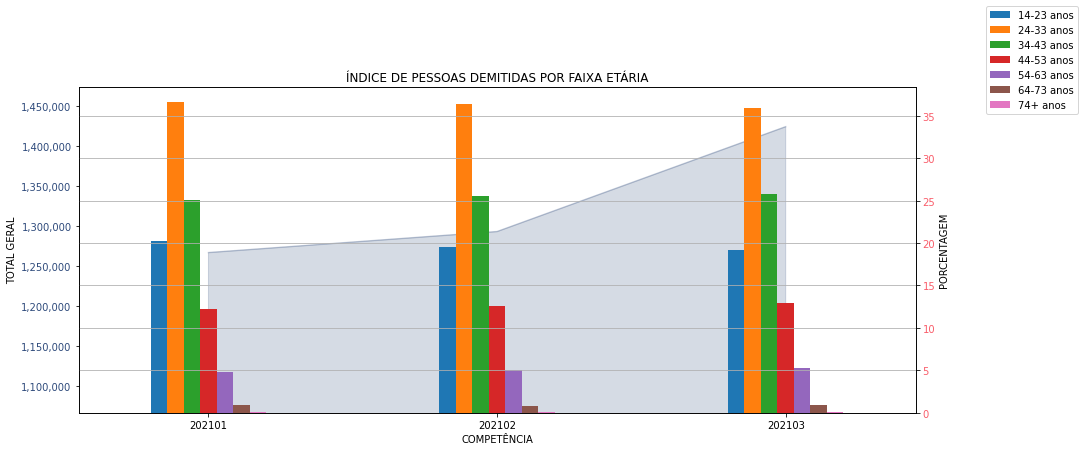

In [38]:
fig, ax1 = plt.subplots()
#ax1
ax1_color = '#2f4b7c'
ax1.set_title('ÍNDICE DE PESSOAS DEMITIDAS POR FAIXA ETÁRIA')
ax1 = demissoes_pivot_df[
    'Total'].plot(kind='area',
                  alpha=0.2,
                  color=ax1_color,
                  figsize = (15,6),
                  ylim=[demissoes_pivot_df['Total'].min()-200000, demissoes_pivot_df['Total'].max()+50000],
                  ylabel='TOTAL GERAL',
                  xlabel='COMPETÊNCIA'
                 )

ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.ticklabel_format(axis='y',style='plain', ) 
ax1.get_yaxis().set_major_formatter(
mpl.ticker.FuncFormatter(
    lambda x, p: format(int(x), ',')))

#ax2
ax2_color = '#f95d6a'
ax2 = ax1.twinx()
ax2.tick_params(axis='y', labelcolor=ax2_color)
demissoes_pivot_df[colunas_grafico_dem].plot.bar(
         width= 0.4,
        grid = True,
#         stacked=True,
        ylabel='PORCENTAGEM',
#          ylim=[0, 70],
         ax=ax2
    ).legend(
    bbox_to_anchor=(1.2, .9), loc='lower right')


<AxesSubplot:title={'center':'ÍNDICE DE PESSOAS DEMITIDAS POR FAIXA ETÁRIA'}, ylabel='Período de Pandemia'>

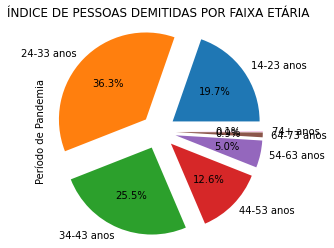

In [39]:
demissoes_pivot_df.sum()[-7:].plot.pie(
    autopct='%1.1f%%',
    explode=(0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2),
    title='ÍNDICE DE PESSOAS DEMITIDAS POR FAIXA ETÁRIA',
    ylabel= 'Período de Pandemia'
)